**Logistic Regression Model with MNIST Dataset**

1.Importing important libraries for the model

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.Logistic Regression Model

In [0]:
class Logistic_Regression:

      #  'train' method takes argument as Learning Rate(alpha), Regularisation Constant(lam), and No.of Iterations(n_iter).
      #  All of these values have been initialised by a default value, but can be changed when required.
      #  J_hist and noi(number of iterations) keeps track of cost along with iteration. 
  
  def train(self,alpha = 0.09,lam = 0.01,n_iter = 3500):
      self.n_iter = n_iter
      self.alpha = alpha
      self.lam = lam
      self.J_hist = []
      self.noi = []
  
      # definition of sigmoid function.
  def sig(self,x):
      return 1/(1+np.exp(-1*x))
  
      # 'fit' takes X_train,y_train , k(no.of classes) as arguments, applies gradinet descent algorithm to fit our parameter theta and returns theta.
  
  def fit(self,X,y,k):
      self.k = k
      m = X.shape[0]
      n = X.shape[1]
      self.theta = np.zeros((self.k,n +1))
      
      # Normalization.
      X= self.normalize(X)
     
      y_k = np.zeros((m,self.k))
      
      # Converting y_k into one vs All type matrix.
      for i in  range(m):
          y_k[i,y[i]] = 1
      
      # Gradient Descent Algorithm
      for i in range(self.n_iter):
          theta1 = self.theta
          theta1[:,0:1] = np.zeros((self.k,1))
          z = X@(self.theta.T)
          h = self.sig(z)
          # Parameter Update
          self.theta = self.theta - (self.alpha/m)*( ((h-y_k).T@X) + self.lam*theta1 )
          # Cost Function Calculation
          cost = (-1*np.sum(y_k*np.log(h) + (1-y_k)*np.log(1-h))/(m)) + (np.sum(self.theta[:,1:]**2)*(self.lam)/(2*m))
          self.J_hist.append(cost)
          self.noi.append(i)
          if(i==0):
            print("Initial Cost:",cost)
          if(i==self.n_iter-1):
            print("Final Cost:",cost)
      return self
      
      # Predicting value of target feature using trained model.     
  def predict(self,X):
      X  = self.normalize(X)
      s = X@self.theta.T
      s = self.sig(s)
      y_pred = s.argmax(axis = 1)
      return y_pred
  
      # Calculates accuracy for our prediction with test example.
  def accuracy(self,y_test,y_pred):
      m = len(y_test)
      sum1 =0
      for i in range(m):
          if(y_test[i]==y_pred[i]):
              sum1+=1
      return (sum1/m)*100
  
      # Normalises X
  def normalize(self,X):
      m = X.shape[0]
      for i in range(X.shape[1]):
          X[:,i] = (X[:,i] - np.mean(X[:,i]))/(np.std(X[:,i]) + np.exp(-9))
      X = np.hstack((np.ones((m, 1)), X))
      return X
  
      # returns the parameter 'theta'
  def get_params(self):
      return self.theta
           
      # splits the dataset into trainig set and test set based on input split fraction
  def test_train_split(self,X,y,size):
      m_test = int(X.shape[0]*size)
      X_test = X[0:m_test,:]
      y_test = y[0:m_test]
      X_train = X[m_test:,:]
      y_train = y[m_test:]
      return X_train,X_test,y_train,y_test   
  
      # plots the learning curve; cost function vs no.of iterations.
  def plot_learn(self):
      plt.plot(self.noi,self.J_hist)
      plt.xlabel("Number Of Iterations")
      plt.ylabel("Cost Function")
      plt.title("Const Function vs Iteration")

      

  

3.Reading the Training Datset using pandas.

In [0]:
df = pd.read_csv('sample_data/mnist_train_small.csv',header = None)

In [0]:
X_train = np.array(df.iloc[:,1:785])
y_train = np.array(df.iloc[:,0])

4.Using 'a' as our model; training and fitting our model

In [0]:
a = Logistic_Regression()

In [0]:
a.train()
a.fit(X_train,y_train,10)

Initial Cost: 6.93147189233805
Final Cost: 0.6174323714273673


5.Learning Curve plot

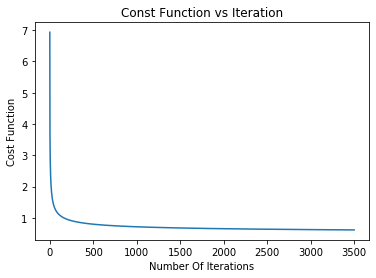

In [0]:
a.plot_learn()

6.Reading the Test Dataset

In [0]:
df1 = pd.read_csv('sample_data/mnist_test.csv',header = None)
X_test = np.array(df1.iloc[:,1:785])
y_test = np.array(df1.iloc[:,0])

In [0]:
y_pred= a.predict(X_train)
print("Test Accuracy:",a.accuracy(y_train,y_pred))
y_pred = a.predict(X_test)
print("Test Accuracy:",a.accuracy(y_test,y_pred))

Test Accuracy: 92.56
Test Accuracy: 90.35
